### Install dependencies

In [1]:
pip install scikit-learn scikit-image prettytable seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import PIL
from PIL import Image
import numpy as np
import pandas as pd
import pickle
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load and resize data

In [3]:
def load_dataset_full_binary(path_to_folder, target_size):
    """
    Loads images in the folder specified by path_to_folder into a dataset and resizes images. 
    Images must organized in subfolders according to their label, with the subfolder
    name specifying the label name.
    Sets label to either Fresh or Rotten, according to the folder name. 
    Returns two arrays: dataset and labels

    Arguments:
    path_to_folder  path where folder is located (string)
    target_size     target size of images in dataset (tuple)
    """
    dataset = []
    labels = []

    # iterate through each folder and assign folder name to label
    for folder_name in os.listdir(path_to_folder):
        folder_path = os.path.join(path_to_folder, folder_name)
        if not os.path.isdir(folder_path):
            continue
        if "Fresh" in folder_name:
            label = "Fresh"
        else:
            label = "Rotten"

        # iterate through each image and load it as a pillow Image object
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            with Image.open(image_path) as image:
                # resize the image to the target size
                image = image.resize(target_size)
                
                # append the image to the dataset list and the corresponding label to the labels list
                dataset.append(np.array(image))
                labels.append(label)

    # convert the dataset and labels lists to NumPy arrays using np.array()
    # normalize the pixel values of the images in the dataset array to be between 0 and 1
    dataset = np.array(dataset, dtype=np.float32) / 255.
    dataset = dataset.astype(np.float64)

    labels = np.array(labels)

    return dataset, labels

In [4]:
# Load and resize data to 128x128 pixels
data, target = load_dataset_full_binary("Augmented_Fruit_Images_Dataset", (128,128))

### Split into training and test set (for SVM and RF)

In [5]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [6]:
# Print unique labels
print(np.unique(y_train))

['Fresh' 'Rotten']


In [7]:
# How many of each label in the train and test sets
tab = PrettyTable(field_names=['Data set split', 'Label 0: Fresh', 'Label 1: Rotten', 'Total'])
tab.add_row(['Train', np.count_nonzero(y_train == 'Fresh'), np.count_nonzero(y_train == 'Rotten'), len(X_train)])
tab.add_row(['Test', np.count_nonzero(y_test == 'Fresh'), np.count_nonzero(y_test == 'Rotten'), len(X_test)])
tab.add_row(['------------','-----------','-----------','-----------'])
tab.add_row(['Total', np.count_nonzero(y_train == 'Fresh')+np.count_nonzero(y_test == 'Fresh'), 
             np.count_nonzero(y_train == 'Rotten')+np.count_nonzero(y_test == 'Rotten'), len(X_train)+len(X_test)])
print(tab)

+----------------+----------------+-----------------+-------------+
| Data set split | Label 0: Fresh | Label 1: Rotten |    Total    |
+----------------+----------------+-----------------+-------------+
|     Train      |      4938      |       4930      |     9868    |
|      Test      |      1256      |       1211      |     2467    |
|  ------------  |  -----------   |   -----------   | ----------- |
|     Total      |      6194      |       6141      |    12335    |
+----------------+----------------+-----------------+-------------+


In [8]:
# Pickle 80:20 split
with open("data_binary_128_split.pkl", "wb") as f: 
    pickle.dump((X_train, X_test, y_train, y_test), f)
f.close()

In [9]:
# Load 80:20 split
X_train, X_test, y_train, y_test = pd.read_pickle(open("data_binary_128_split.pkl", "rb"))

### Split into training, validation and test set (for CNN)
Further split the train set into train and val

In [10]:
# Split the training data into train and validation sets for CNN - 0.25 gets a 60:20:20 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [11]:
# How many of each label in the train, validation and test sets
tab = PrettyTable(field_names=['Data set split', 'Label 0: Fresh', 'Label 1: Rotten', 'Total'])
tab.add_row(['Train', np.count_nonzero(y_train == 'Fresh'), np.count_nonzero(y_train == 'Rotten'), len(X_train)])
tab.add_row(['Validation', np.count_nonzero(y_val == 'Fresh'), np.count_nonzero(y_val == 'Rotten'), len(X_val)])
tab.add_row(['Test', np.count_nonzero(y_test == 'Fresh'), np.count_nonzero(y_test == 'Rotten'), len(X_test)])
tab.add_row(['------------','-----------','-----------','-----------'])
tab.add_row(['Total', np.count_nonzero(y_train == 'Fresh')+np.count_nonzero(y_val == 'Fresh')+np.count_nonzero(y_test == 'Fresh'), 
             np.count_nonzero(y_train == 'Rotten')+np.count_nonzero(y_val == 'Rotten')+np.count_nonzero(y_test == 'Rotten'), 
             len(X_train)+len(X_val)+len(X_test)])
print(tab)

+----------------+----------------+-----------------+-------------+
| Data set split | Label 0: Fresh | Label 1: Rotten |    Total    |
+----------------+----------------+-----------------+-------------+
|     Train      |      3741      |       3660      |     7401    |
|   Validation   |      1197      |       1270      |     2467    |
|      Test      |      1256      |       1211      |     2467    |
|  ------------  |  -----------   |   -----------   | ----------- |
|     Total      |      6194      |       6141      |    12335    |
+----------------+----------------+-----------------+-------------+


In [12]:
# Pickle 60:20:20 split
with open("data_binary_128_split_val.pkl", "wb") as f: 
    pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), f)
f.close()

In [13]:
# Load 60:20:20 split
X_train, X_val, X_test, y_train, y_val, y_test = pd.read_pickle(open("data_binary_128_split_val.pkl", "rb"))

### Visualize the data

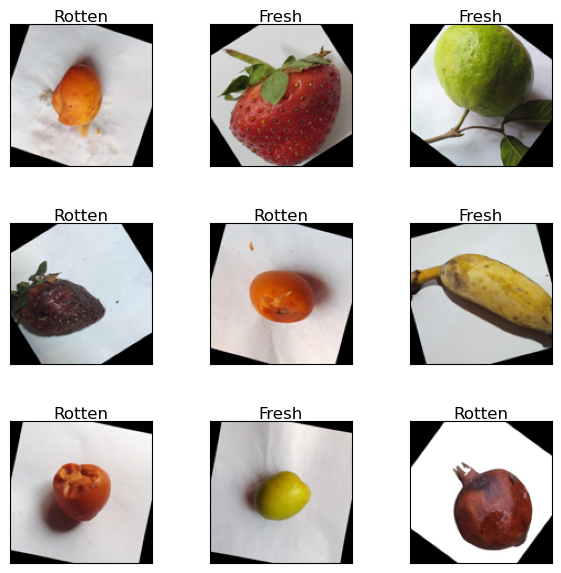

In [14]:
# Define a function to plot the images
def plot_images(images, labels):
    fig, axs = plt.subplots(3, 3, figsize=(7, 7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.set_xticks([])
        ax.set_yticks([])
        class_name = labels[i]
        ax.set_title(class_name, fontsize=12, pad=2)

# Plot some random images to inspect load
indices = np.random.choice(range(len(X_train)), size=9, replace=False)
images = X_train[indices]
labels = y_train[indices]
plot_images(images, labels)